# Testing Pdot to see if this could be observable with LSST

In [250]:
import numpy as np
from astropy import units, constants
from astropy.table import Table
import pandas as pd

import os

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.evolve import Evolve
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.5, 'mxns': 2.5, 'beta': 0.125, 'tflag': 1, 'acc2': 1.5, 'remnantflag': 3, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -1.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.5, 'ecsn_mlow' : 1.4, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 2, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 0, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014}

In [3]:
%load_ext autoreload
%autoreload 2

from binaryTides import *

In [375]:
#choose the relevant initial conditions
m1 = 1 #Msun
m2 = 1 #Msun
ecc = 0.9
Zmet = 0.02

tend = (1000*units.yr).to(units.Myr).value #Myr
tend = 1000

#find the orbital period right before RLOF
# q = m2/m1
# RL = 0.49*q**(2./3.)/(0.6*q**(2./3.) + np.log(1. + q**(1./3.))) 
# r1 = 0.883247*units.solRad #from BSE
# a = (r1/RL)/(1 - ecc)
# porb = (1.0 - 5e-7)*(2.*np.pi*(a**3./(constants.G*(m1 + m2)*units.solMass))**0.5).to(units.day).value
# print(porb)

porb = 10 #days


In [376]:
#get initial values for stars from COSMIC
binary = InitialBinaryTable.InitialBinaries(m1=m1, m2=m2, porb=porb, ecc=ecc, tphysf=tend, kstar1=1, kstar2=1, metallicity=Zmet)
bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=binary, BSEDict=BSEDict, dtp=tend/100)
bn = bcm.iloc[0]
bcm

/Users/ageller/anaconda3/envs/EBLSST/lib/python3.7/site-packages/cosmic/evolve.py:534: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  output = np.array(output)


,tphys,kstar_1,mass0_1,mass_1,lum_1,rad_1,teff_1,massc_1,radc_1,menv_1,...,porb,sep,ecc,B_1,B_2,SN_1,SN_2,bin_state,merger_type,bin_num
0,0.0,1.0,1.0,1.0,0.628609,0.883247,5493.178795,0.0,0.0,0.03289,...,10.000000,24.601517,0.900000,0.0,0.0,0.0,0.0,0,-001,0
0,10.0,1.0,1.0,1.0,0.628944,0.883406,5493.417511,0.0,0.0,0.03289,...,4.081873,13.537387,0.817641,0.0,0.0,0.0,0.0,0,-001,0
0,20.0,1.0,1.0,1.0,0.629280,0.883565,5493.656913,0.0,0.0,0.03289,...,3.950193,13.244659,0.813471,0.0,0.0,0.0,0.0,0,-001,0
0,30.0,1.0,1.0,1.0,0.629617,0.883724,5493.896998,0.0,0.0,0.03289,...,3.833452,12.982408,0.809562,0.0,0.0,0.0,0.0,0,-001,0
0,40.0,1.0,1.0,1.0,0.629954,0.883883,5494.137764,0.0,0.0,0.03289,...,3.728885,12.745237,0.805874,0.0,0.0,0.0,0.0,0,-001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,960.0,1.0,1.0,1.0,0.663151,0.898735,5518.953303,0.0,0.0,0.03289,...,1.517749,6.999954,0.607071,0.0,0.0,0.0,0.0,0,-001,0
0,970.0,1.0,1.0,1.0,0.663536,0.898900,5519.249272,0.0,0.0,0.03289,...,1.506230,6.964493,0.604321,0.0,0.0,0.0,0.0,0,-001,0
0,980.0,1.0,1.0,1.0,0.663922,0.899065,5519.545746,0.0,0.0,0.03289,...,1.494763,6.929099,0.601533,0.0,0.0,0.0,0.0,0,-001,0
0,990.0,1.0,1.0,1.0,0.664309,0.899230,5519.842723,0.0,0.0,0.03289,...,1.483346,6.893771,0.598707,0.0,0.0,0.0,0.0,0,-001,0


In [377]:
#try using the default BSE as another comparison (from my downloaded15Apr2021 directory)
initStr =  f'{m1} {m2} {tend} {porb} 1 1 {Zmet} {ecc}\n'
initStr += f'{BSEDict["neta"]} {BSEDict["bwind"]} {BSEDict["hewind"]} {BSEDict["alpha1"]} {BSEDict["lambdaf"]}\n'
initStr += f'{BSEDict["ceflag"]} {BSEDict["tflag"]} {BSEDict["ifflag"]} {BSEDict["wdflag"]} {BSEDict["bhflag"]} 1 {BSEDict["mxns"]} 12345\n'
initStr += f'{BSEDict["pts1"]} {BSEDict["pts2"]} {BSEDict["pts3"]}\n'
initStr += f'{BSEDict["sigma"]} {BSEDict["beta"]} {BSEDict["xi"]} {BSEDict["acc2"]} {BSEDict["epsnov"]} {BSEDict["eddfac"]} {BSEDict["gamma"]}\n'

initFile = open("binary.in", "w")
initFile.write(initStr)
initFile.close()
os.system("./bse")

print(initStr)
#default from BSE (after 1st line)
# 0.5 0.5 10000. 8.0 1 1 0.02 0.8
# 0.5 0.0 1.0 3.0 0.5
# 0 1 0 1 0 1 3.0 29769
# 0.05 0.01 0.02
# 190.0 0.125 1.0 1.5 0.001 10.0 -1.0

df = pd.read_csv('binary.dat', header=None, sep='\s+', 
                 names=['t','k1','k2','m1','m2','mc1','mc2','logR1','logR2','RRL1','RRL2','logL1','logL2','omega1','omega2',
                        'dmt1','dmt2','a','e'])
df.drop(df.tail(2).index,inplace=True)
df

1 1 1000 10 1 1 0.02 0.9
0.5 0.0 0.5 1.0 0.5
0 1 0 1 1 1 2.5 12345
0.001 0.01 0.02
265.0 0.125 1.0 1.5 0.001 1.0 -1.0



,t,k1,k2,m1,m2,mc1,mc2,logR1,logR2,RRL1,RRL2,logL1,logL2,omega1,omega2,dmt1,dmt2,a,e
0,0.0000,1,1,1.0,1.0,0.0,0.0,-0.0515,-0.0515,0.0953,0.0953,-0.1563,-0.1563,1053.0,1053.0,0.0,0.0,24.600,0.900
1,6.1419,1,1,1.0,1.0,0.0,0.0,-0.0514,-0.0514,0.1721,0.1721,-0.1562,-0.1562,5315.0,5315.0,0.0,0.0,13.630,0.819
2,11.7526,1,1,1.0,1.0,0.0,0.0,-0.0514,-0.0514,0.1747,0.1747,-0.1561,-0.1561,5265.0,5265.0,0.0,0.0,13.420,0.816
3,17.4671,1,1,1.0,1.0,0.0,0.0,-0.0513,-0.0513,0.1775,0.1775,-0.1559,-0.1559,5227.0,5227.0,0.0,0.0,13.210,0.813
4,23.2643,1,1,1.0,1.0,0.0,0.0,-0.0513,-0.0513,0.1805,0.1805,-0.1558,-0.1558,5198.0,5198.0,0.0,0.0,13.000,0.810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,996.4730,1,1,1.0,1.0,0.0,0.0,-0.0434,-0.0434,0.6417,0.6417,-0.1328,-0.1328,3888.0,3888.0,0.0,0.0,3.722,0.000
558,997.3751,1,1,1.0,1.0,0.0,0.0,-0.0433,-0.0433,0.6418,0.6418,-0.1328,-0.1328,3889.0,3889.0,0.0,0.0,3.721,0.000
559,998.2764,1,1,1.0,1.0,0.0,0.0,-0.0433,-0.0433,0.6419,0.6419,-0.1328,-0.1328,3890.0,3890.0,0.0,0.0,3.721,0.000
560,999.1769,1,1,1.0,1.0,0.0,0.0,-0.0433,-0.0433,0.6420,0.6420,-0.1328,-0.1328,3891.0,3891.0,0.0,0.0,3.720,0.000


In [378]:
#my code
#I am trying to add in the evolution from cosmic as a check
b = InitialBinaryTable.InitialBinaries(m1=m1, m2=m2, porb=1e10, ecc=0, tphysf=tend, kstar1=1, kstar2=1, metallicity=Zmet)
bppIn, bcmIn, initC, kick_info = Evolve.evolve(initialbinarytable=b, BSEDict=BSEDict, dtp=tend/100)
binary = initBinary(bcm = Table.from_pandas(bcmIn),
                    p = bn['porb']*units.day, 
                    e = bn['ecc'])

integrator = TidesIntegrator(binary)
integrator.evolve(tend*units.Myr,dt = tend/100*units.Myr)

/Users/ageller/anaconda3/envs/EBLSST/lib/python3.7/site-packages/cosmic/evolve.py:534: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  output = np.array(output)


binary semi-major axis =  0.11444874830158493 AU
binary omega1 =  1058.9837892769335 1 / yr 1058.9837892769335


In [379]:
integrator.result

tphys,ecc,sma,porb,omega1,omega2,dadt,dedt,dpdt,do1dt,do2dt
yr,,solRad,yr,1 / yr,1 / yr,solRad / yr,1 / yr,,1 / yr2,1 / yr2
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.0,0.9,24.610161061085734,0.027378507871320967,1058.9837892769335,1058.9837892769335,0.0,0.0,0.0,0.0,0.0
88339.2497847887,0.899,24.367313234207728,0.026974261321434774,1112.1458909359956,1112.1458909359956,2.7490365547548704e-06,1.1319996518378774e-08,4.5760695372783275e-09,-0.0006017948056902802,-0.0006017948056902802
186703.74890141533,0.898,24.129247664227115,0.026579925728831374,1165.2331438974238,1165.2331438974238,2.420238725542112e-06,1.0166269426272816e-08,4.00892187877511e-09,-0.0005396993167065785,-0.0005396993167065785
295529.91922596365,0.897,23.895825321045873,0.026195165329917138,1218.2444684070977,1218.2444684070977,2.1449100201276554e-06,9.188966192761701e-09,3.53555029793642e-09,-0.00048711926875291223,-0.00048711926875291223
415242.52479909227,0.896,23.66691252583481,0.02581965885936157,1271.1787681129474,1271.1787681129474,1.9121862239580694e-06,8.353339192748024e-09,3.1367329176223044e-09,-0.00044217816037354457,-0.00044217816037354457
546255.3331144347,0.895,23.442380696281003,0.025453098792506398,1324.0349297776845,1324.0349297776845,1.713815866105005e-06,7.632841497398038e-09,2.7978948895811577e-09,-0.0004034427041477843,-0.0004034427041477843
688971.7409290753,0.894,23.22210610625663,0.025095190634123212,1376.8118229862346,1376.8118229862346,1.543442645434755e-06,7.006902817360683e-09,2.507827683331514e-09,-0.00036980256171453304,-0.00036980256171453304
843785.3668769094,0.893,23.005969658965352,0.024745652250277944,1429.5082998478115,1429.5082998478115,1.3961073902119295e-06,6.459379746954316e-09,2.2578011573932656e-09,-0.0003403865553755163,-0.0003403865553755163


(0.0, 7450.715821367081)

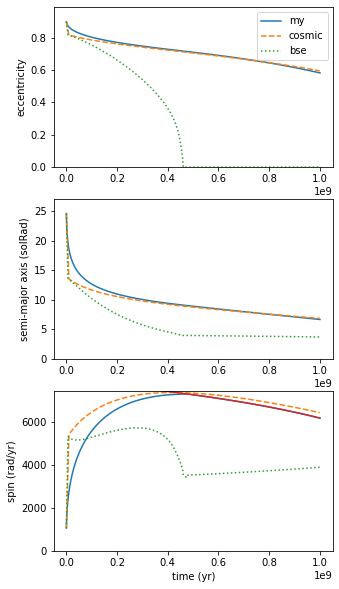

In [380]:
#my integrator
t = integrator.result['tphys'].to(units.yr).value
e = integrator.result['ecc'].data
a = integrator.result['sma'].to(units.solRad).value
p = integrator.result['porb'].to(units.yr).value
o1 = integrator.result['omega1'].to(1./units.yr).value
o2 = integrator.result['omega2'].to(1./units.yr).value

#cosmic
tc = bcm['tphys'].values
ac = bcm['sep'].values
ec = bcm['ecc'].values
o1c = bcm['omega_spin_1'].values
o2c = bcm['omega_spin_2'].values

#bse
tb = df['t'].values
ab = df['a'].values
eb = df['e'].values
o1b = df['omega1'].values
o2b = df['omega2'].values

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

f, ax = plt.subplots(3,1, figsize=(5,10))

ax[0].plot(t, e, label='my')
ax[0].plot(tc*1e6,ec,linestyle='dashed', label='cosmic')
ax[0].plot(tb*1e6,eb,linestyle='dotted', label='bse')
ax[0].set_ylabel('eccentricity')
ax[0].set_ylim(0,1.1*max(e))
ax[0].legend()

ax[1].plot(t, a)
ax[1].plot(tc*1e6,ac,linestyle='dashed')
ax[1].plot(tb*1e6,ab,linestyle='dotted')
ax[1].set_ylabel('semi-major axis (solRad)')
ax[1].set_ylim(0,1.1*max(a))

ax[2].plot(t,o1)#, c=colors[0])
ax[2].plot(tc*1e6,o1c, linestyle='dashed')#, c=colors[0])
ax[2].plot(tb*1e6,o1b, linestyle='dotted')#, c=colors[0])
#ax[2].plot(tc*1e6,o2c, linestyle='dashed', c=colors[1])
#ax[2].plot(t,o2, c=colors[1])
ax[2].set_ylabel('spin (rad/yr)')
ax[2].set_xlabel('time (yr)')

f2 = 1. + 15./2.*e**2. +  45./8.*e**4. +   5./16.*e**6.
f5 = 1. +     3.*e**2. +   3./8.*e**4.
omega_orb = np.nan_to_num(2.*np.pi/p,0.)
omega_eq = f2*omega_orb/(f5*(1. - e**2.)**(3./2.))
ax[2].plot(t[1:],omega_eq[:-1])#, c=colors[2])

ym = max(np.concatenate((o1c,o1b,o1)))
ax[2].set_ylim(0,1.01*ym)
#ax[2].set_ylim(0.8*ym,1.01*ym)

#ax[2].set_ylim(0,1.01*max(spin_eq))
#ax[2].set_ylim(0,1.01*max(o1))


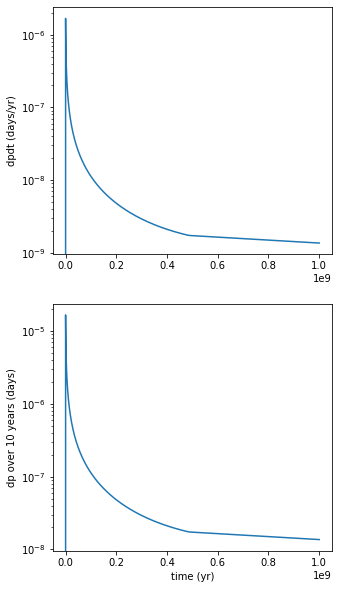

In [381]:
t = integrator.result['tphys'].to(units.yr).value
dpdt = integrator.result['dpdt']*(integrator.result['tphys'].unit.to(units.day)) #trying for days/year

f, ax = plt.subplots(2,1,figsize=(5,10))
ax[0].plot(t,dpdt)
ax[0].set_ylabel('dpdt (days/yr)')
ax[0].set_yscale('log')

ax[1].plot(t,dpdt*10.)
ax[1].set_ylabel('dp over 10 years (days)')
ax[1].set_xlabel('time (yr)')
ax[1].set_yscale('log')
